Problem Statement : FORCAST NEXT 12 MONTH ALCOHOL SALES

In [2]:
import pandas as pd

In [3]:
ass = pd.read_csv(r"C:\Users\HP\Downloads\Alcohol_Sales.csv")

In [4]:
ass
# to see the 1st and Last  5 records

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [5]:
import matplotlib.pyplot as plt

In [6]:
ass.isnull().sum()
# to check Null values

DATE              0
S4248SM144NCEN    0
dtype: int64

In [7]:
ass.DATE = pd.to_datetime(ass.DATE , infer_datetime_format=True)
# covert date_time format

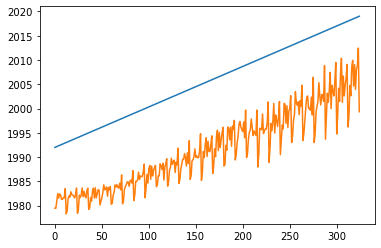

In [8]:
plt.plot(ass) 
# data visualize

In [9]:
ass = ass.set_index(['DATE'])
# we put the date column in index

In [11]:
ass

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


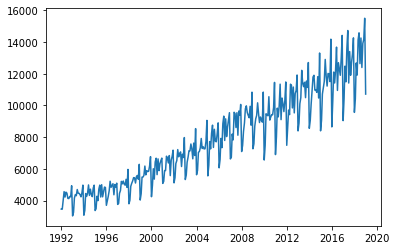

In [12]:
plt.plot(ass)

In [13]:
ass.diff()
# the above graph shows the plot is not stationary 
# so we did the differncing

,S4248SM144NCEN
DATE,
1992-01-01,NaN
1992-02-01,-1.0
1992-03-01,544.0
1992-04-01,562.0
1992-05-01,-343.0
...,...
2018-09-01,-1861.0
2018-10-01,1518.0
2018-11-01,260.0


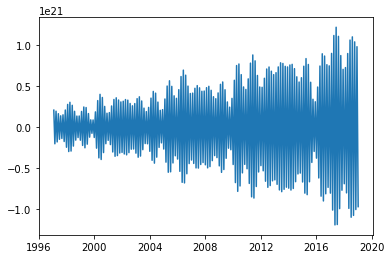

In [12]:
plt.plot(ass.diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff().diff())
# even after multiple differencing  plot stil not stationary

In [13]:
# after multiple differencing series does not stationary

In [14]:
import numpy as np

In [15]:
ass_log= np.log(ass)

In [16]:
ass_log

,S4248SM144NCEN
DATE,
1992-01-01,8.148735
1992-02-01,8.148446
1992-03-01,8.294550
1992-04-01,8.425955
1992-05-01,8.347827
...,...
2018-09-01,9.425129
2018-10-01,9.540651
2018-11-01,9.559165


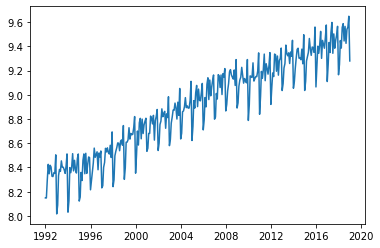

In [17]:
plt.plot(ass_log)

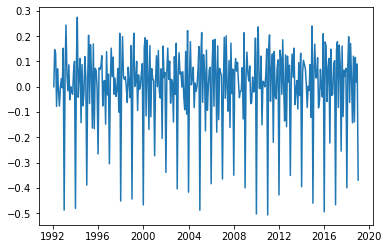

In [18]:
plt.plot(ass_log.diff())

In [19]:
# so when we do forcast , forecasting would also be in long
# so we need to take anti log to get the data in same range(scale)

In [20]:
# for building the model we need to know 3 things(p= , d=1, q= )

In [21]:
# to find p and q lets use ACF and PACF

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

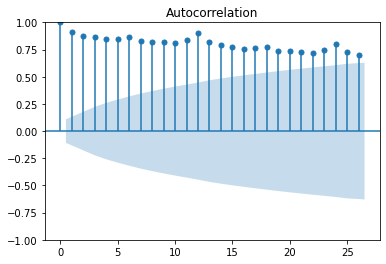

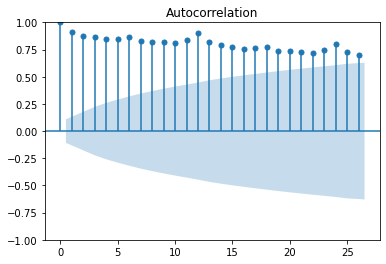

In [23]:
plot_acf(ass_log)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


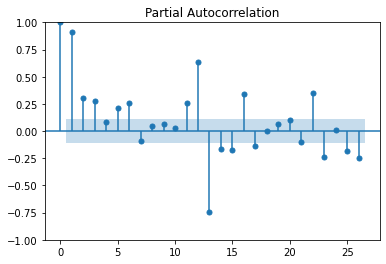

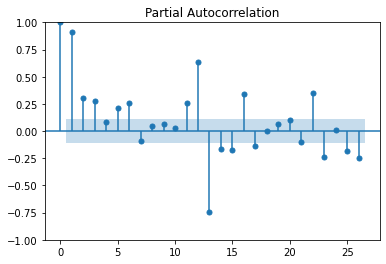

In [24]:
plot_pacf(ass_log)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima
# import the libraries

In [26]:
result = seasonal_decompose(ass_log)

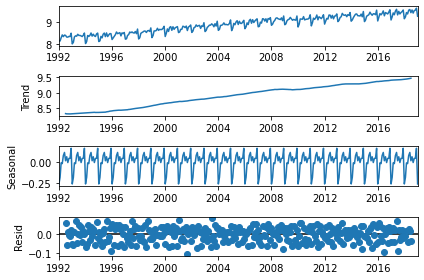

In [27]:
result.plot();
# we check seasoanality

In [28]:
auto_arima(ass_log, seasonal=True, m=12)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(1, 0, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [29]:
# wharever value u got from auto arima pass them in sarima

In [30]:
model_sarima = SARIMAX(ass_log, order=(2,0,0), seasonal_order=(0,1,1,12))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [31]:
ass_model = model_sarima.fit()
# we build the model

In [32]:
pred_values = ass_model.predict(start=325, end= 336)

In [33]:
pred_values

2019-02-01    9.301936
2019-03-01    9.496574
2019-04-01    9.421714
2019-05-01    9.582492
2019-06-01    9.593834
2019-07-01    9.476038
2019-08-01    9.585858
2019-09-01    9.442070
2019-10-01    9.562664
2019-11-01    9.579041
2019-12-01    9.672763
2020-01-01    9.307169
Freq: MS, Name: predicted_mean, dtype: float64

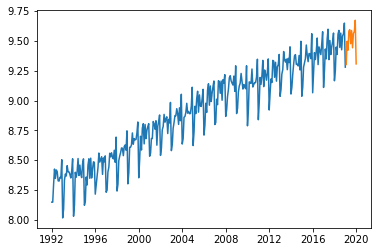

In [34]:
plt.plot(ass_log)
plt.plot(pred_values)

In [35]:
pred_values1 = np.exp(pred_values).round()

In [36]:
pred_values1
# here is 12 month sales of alcohol prediction 

2019-02-01    10959.0
2019-03-01    13314.0
2019-04-01    12354.0
2019-05-01    14509.0
2019-06-01    14674.0
2019-07-01    13043.0
2019-08-01    14557.0
2019-09-01    12608.0
2019-10-01    14224.0
2019-11-01    14459.0
2019-12-01    15879.0
2020-01-01    11017.0
Freq: MS, Name: predicted_mean, dtype: float64

In [37]:
df = pd.DataFrame()
# here we create dataframe variable name 'df'

In [38]:
df['Predicted']  =  pred_values1
# add the column in df

In [40]:
date_for_pred =['2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01']

In [41]:
df["DATE"] = date_for_pred
# add the column in df

In [42]:
df.DATE = pd.to_datetime(df.DATE, infer_datetime_format=True)

In [43]:
df= df.set_index(['DATE'])

<AxesSubplot:xlabel='DATE'>

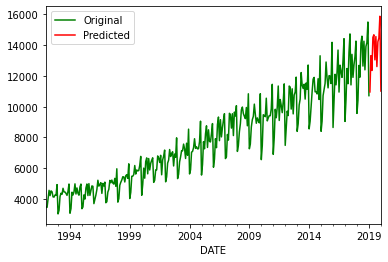

In [44]:
ass['S4248SM144NCEN'].plot(legend=True, label='Original',color='green')    # this is the original data
df['Predicted']     .plot(     legend = True ,  label ='Predicted'  , color ='red')   # this is the forcasted data


In [ ]:
# we conclude model build in right direction beacuase it also follow thw graph.